In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import json
import pickle

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_mis=pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/train_set.csv')
df_mis

,Video ID,Transcript,file_path,arousal,valence,dominance,label
0,has2-4hojwo,I'll be honest and open right now I absolutely...,/data/misogyny/has2-4hojwo.wav,0.958336,0.891832,0.387776,1
1,TPjcecKNM3Q,so but my point is as a whole you're saying th...,/data/misogyny/TPjcecKNM3Q.wav,0.855143,0.838724,0.461524,1
2,p5-qzXcqCe0,you say a lot of stuff about women like that t...,/data/misogyny/p5-qzXcqCe0.wav,0.844659,0.816650,0.258614,1
3,a8BD7kMkn8k,sexism inherently benefits women it creates a ...,/data/misogyny/a8BD7kMkn8k.wav,0.852486,0.837307,0.242076,1
4,BZxS1SSAMdE,I stopped posting bikini photos on my Instagra...,/data/misogyny/BZxS1SSAMdE.wav,0.729332,0.733484,0.253274,1
...,...,...,...,...,...,...,...
225,audio_77.wav,you are fine that you're physical attributes i...,/data/misogyny/audio_77.wav,0.497918,0.543595,0.680151,1
226,audio_78.wav,did you get breast implants? I you know they a...,/data/misogyny/audio_78.wav,0.818031,0.778066,0.782577,1
227,audio_79.wav,ask me how do you balance work and family but ...,/data/misogyny/audio_79.wav,0.671595,0.698949,0.515137,1
228,audio_80.wav,you can't speak to a woman like that yeah all ...,/data/misogyny/audio_80.wav,0.517065,0.501510,0.424699,1


In [ ]:
def generate_tfidf(data,clean):
  tfidf_vectorizer = TfidfVectorizer() 
  sw = stopwords.words('english') #you can adjust the language as you desire
  sw.remove('not') #we exclude not from the stopwords corpus since removing not from the text will change the context of the text
  transcripts=data['transcript'].copy()
  if clean:
    tokens_to_text=[]
    for i in range (len(transcripts)):
      transcripts[i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", transcripts[i])
      transcripts[i] = transcripts[i].lower() 
      transcripts[i] = word_tokenize(transcripts[i])
      transcripts[i] = [word for word in transcripts[i] if not word in sw]
      s = ' '.join(transcripts[i])
      tokens_to_text.append(s)
    data['clean_transcript']=tokens_to_text
    tfidf_train_vectors = tfidf_vectorizer.fit_transform(data['clean_transcript'])

  else:
    tfidf_train_vectors = tfidf_vectorizer.fit_transform(data['transcript'])
  
  with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/tfidf_eval_cleaned.pkl', 'wb') as fin:
    pickle.dump(tfidf_train_vectors, fin)
  #tfidf_test_vectors = tfidf_vectorizer.transform(df_ami_test['clean_text'])
  return tfidf_train_vectors

In [ ]:
generate_tfidf(df_mis,clean=True)#generate tfidf for cleaned data
#generate_tfidf(df_mis,clean=False)#generate tfidf for uncleaned data

<57x1279 sparse matrix of type '<class 'numpy.float64'>'
	with 2264 stored elements in Compressed Sparse Row format>

In [ ]:
#lower?
#punctuation
#stopwords

### Fusion of both modalities

In [ ]:
#paper hyperparameters
#3mlp
#2 dropout
#relu
#he normalization method
#sigmoid
#0.7 thereshold
#bce loss
#l2 weight constraint
#Adam


In [ ]:
import joblib
import numpy as np

In [ ]:
bert_embeddings=joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/bert_train_embeddings.pkl')

In [ ]:
bert_embeddings[0].shape

(768,)

In [ ]:
combined_embeddings=[]
for i,j in zip(bert_embeddings,df_mis.iterrows()):
  #print(j[1]['arousal'])
  i=np.append(i,j[1]['arousal'])
  #print(i.shape)
  i=np.append(i,j[1]['valence'])
  #print(i.shape)
  i=np.append(i,j[1]['dominance'])
  #print(i.shape)
  combined_embeddings.append(i)

In [ ]:
combined_embeddings[0].shape

(771,)

In [ ]:
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
# for later versions: 
# tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
# for later versions:
# session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
# tf.compat.v1.keras.backend.set_session(sess)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [ ]:
#nice
model = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model.add(Dense(32,input_dim=771)),
model.add(Activation('relu')),
model.add(Dropout(0.25)),#nice
model.add(Dense(16)),
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001,weight_decay=0.001), metrics=['accuracy'])


In [ ]:
from tensorflow.keras.regularizers import l2
model = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model.add(Dense(32,input_dim=771,kernel_regularizer=l2(1e-5),activation="relu")),
model.add(Dropout(0.25)),#nice
model.add(Dense(16,kernel_regularizer=l2(1e-5),activation="relu")),
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model.add(Dense(32,input_dim=771,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model.add(Dropout(0.25)),#nice
model.add(Dense(16,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 32)                24704     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(np.array(combined_embeddings), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 1s 5ms/step - loss: 0.6823 - accuracy: 0.5761 - val_loss: 0.7366 - val_accuracy: 0.3478
Epoch 2/30
37/37 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.6359 - val_loss: 0.6786 - val_accuracy: 0.4130
Epoch 3/30
37/37 [==============================] - 0s 2ms/step - loss: 0.6194 - accuracy: 0.6304 - val_loss: 0.6255 - val_accuracy: 0.6957
Epoch 4/30
37/37 [==============================] - 0s 2ms/step - loss: 0.5898 - accuracy: 0.6685 - val_loss: 0.5770 - val_accuracy: 0.8261
Epoch 5/30
37/37 [==============================] - 0s 2ms/step - loss: 0.5734 - accuracy: 0.7391 - val_loss: 0.5326 - val_accuracy: 0.8913
Epoch 6/30
37/37 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7935 - val_loss: 0.4988 - val_accuracy: 0.9130
Epoch 7/30
37/37 [==============================] - 0s 2ms/step - loss: 0.5163 - accuracy: 0.8098 - val_loss: 0.4643 - val_accuracy: 0.9565
Epoch 8/30
37/37 [==

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

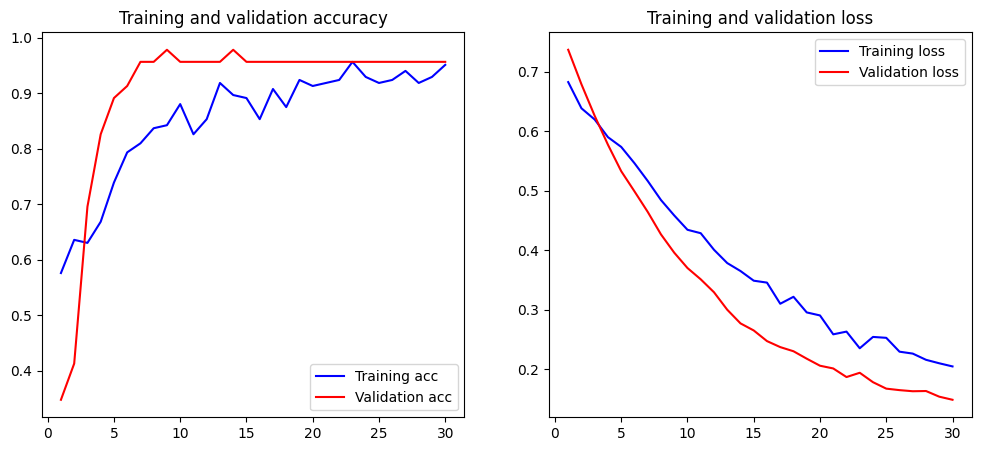

In [ ]:
plot_history(history)

In [ ]:
model.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models1')

In [ ]:
from tensorflow import keras
model2 = keras.models.load_model('/content')
model2.predict(np.array(combined_embeddings))

MLP with concat

In [ ]:
avd=[]
avd.append(df_mis['arousal'][0])
avd.append(df_mis['valence'][0])
avd.append(df_mis['dominance'][0])

In [ ]:
avd

[0.38659328, 0.43033722, 0.41227335]

In [ ]:
avd=np.array(avd)

In [ ]:
avd.shape

(3,)

In [ ]:
V=len(bert_embeddings[0])
avd.resize(V,refcheck=False)

In [ ]:
np.row_stack((bert_embeddings[0],avd))

array([[ 9.35519785e-02, -6.94790259e-02,  4.35412288e-01, ...,
        -1.04330838e-01,  2.42160633e-04, -2.16907829e-01],
       [ 3.86593280e-01,  4.30337220e-01,  4.12273350e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [ ]:
combined_embeddings_append=[]
avd=np.array([])
V=len(bert_embeddings[0])
for i,j in zip(bert_embeddings,df_mis.iterrows()):
  print(i)
  avd=np.append(avd,j[1]['arousal'])
  avd=np.append(avd,j[1]['valence'])
  avd=np.append(avd,j[1]['dominance'])
  avd.resize(V,refcheck=False)
  combined_embeddings_append.append(np.row_stack((i,avd)))

Streaming output truncated to the last 5000 lines.
 -2.15321183e-01  7.09818155e-02 -1.68474466e-01  9.76157337e-02
 -2.77800739e-01 -1.45512938e-01  5.07708006e-02 -2.37319499e-01
  2.16101795e-01  4.75010276e-02  1.93620361e-02  1.15209864e-02
  6.74841106e-02 -2.64051288e-01 -2.92931527e-01 -2.57423550e-01
  2.97166705e-02 -1.69947803e-01 -1.65294260e-01 -1.60791799e-01
 -3.99087630e-02  3.85193992e-03  1.02109350e-01 -3.33350241e-01
 -5.56725413e-02 -1.77658990e-01 -1.19643144e-01  3.13539982e-01
  6.26885593e-02  5.29688224e-02  7.31477514e-02  6.56479374e-02]
[ 4.47516739e-02 -1.23811372e-01  3.30050170e-01 -1.08462824e-02
  2.97829024e-02 -5.01465909e-02  1.92346126e-01  1.52800664e-01
  2.30323434e-01 -1.35519639e-01 -1.83297455e-01 -1.11435605e-02
 -1.77111272e-02  4.82525155e-02  8.20318982e-03  2.94983715e-01
  1.57451555e-01  2.24395111e-01 -1.12301305e-01  8.01074356e-02
 -7.01299086e-02 -2.17202395e-01 -2.21364930e-01 -1.31088808e-01
  2.82282889e-01  7.49303997e-02 -2.99

In [ ]:
combined_embeddings_append[1].shape

(2, 768)

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model2 = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model2.add(Dense(64,input_shape=(2,768),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model2.add(Dropout(0.25)),#nice
model2.add(Dense(32,activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 2, 64)             49216     
                                                                 
 dropout_23 (Dropout)        (None, 2, 64)             0         
                                                                 
 dense_70 (Dense)            (None, 2, 32)             2080      
                                                                 
 dense_71 (Dense)            (None, 2, 1)              33        
                                                                 
Total params: 51,329
Trainable params: 51,329
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model2.fit(np.array(combined_embeddings_append), df_mis['label'], epochs=20, batch_size=5,validation_split=0.2)

Epoch 1/20
37/37 [==============================] - 1s 7ms/step - loss: 0.6922 - accuracy: 0.5652 - val_loss: 0.7457 - val_accuracy: 0.3261
Epoch 2/20
37/37 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.5897 - val_loss: 0.6950 - val_accuracy: 0.4022
Epoch 3/20
37/37 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6332 - val_loss: 0.6575 - val_accuracy: 0.4783
Epoch 4/20
37/37 [==============================] - 0s 3ms/step - loss: 0.6176 - accuracy: 0.6467 - val_loss: 0.6239 - val_accuracy: 0.5652
Epoch 5/20
37/37 [==============================] - 0s 2ms/step - loss: 0.6190 - accuracy: 0.6848 - val_loss: 0.5942 - val_accuracy: 0.6087
Epoch 6/20
37/37 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.7147 - val_loss: 0.5689 - val_accuracy: 0.6304
Epoch 7/20
37/37 [==============================] - 0s 3ms/step - loss: 0.5665 - accuracy: 0.7201 - val_loss: 0.5487 - val_accuracy: 0.6413
Epoch 8/20
37/37 [==

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

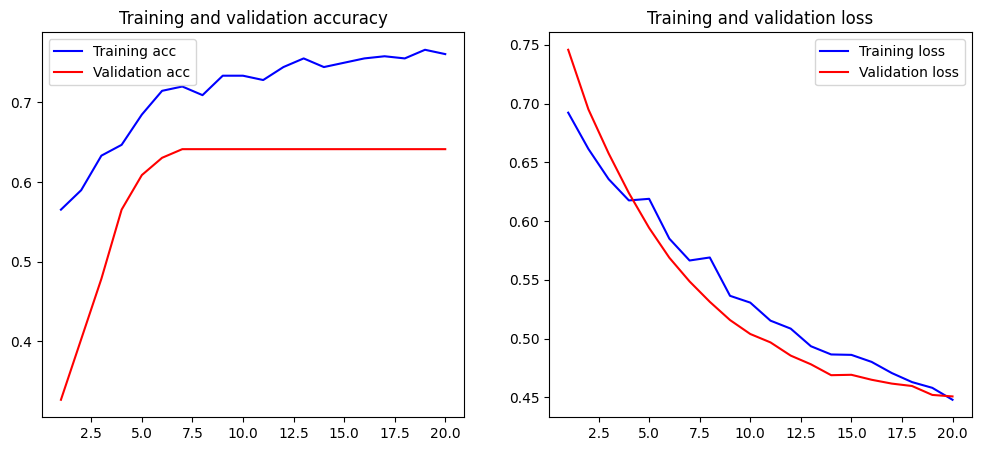

In [ ]:
plot_history(history)

In [ ]:
model2.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_append')

### MLP with TFIDF clean

In [ ]:
import pickle 

data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/tfidf_train_cleaned.pkl', 'rb') as file:
  data = pickle.load(file)

In [ ]:
embeddings = [] 
for i in range(data.shape[0]):
  embeddings.append(data[i].toarray().tolist()[0]) 

In [ ]:
vad = []
for i, j in df_mis.iterrows():
  vad.append([j['arousal'], j['valence'], j['dominance']])   

In [ ]:
concat_array = [] 
for i in range(len(embeddings)): 
  concat_array.append(embeddings[i]+vad[i]) 

In [ ]:
len(concat_array[0])

3626

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model3 = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model3.add(Dense(64,input_dim=3626,kernel_regularizer=l2(1e-6),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model3.add(Dropout(0.25)),#nice
model3.add(Dense(32,kernel_regularizer=l2(1e-6),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 64)                232128    
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 32)                2080      
                                                                 
 dense_59 (Dense)            (None, 1)                 33        
                                                                 
Total params: 234,241
Trainable params: 234,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model3.fit(np.array(concat_array), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 1s 12ms/step - loss: 0.6945 - accuracy: 0.4565 - val_loss: 0.6883 - val_accuracy: 0.6087
Epoch 2/30
37/37 [==============================] - 0s 8ms/step - loss: 0.6899 - accuracy: 0.5978 - val_loss: 0.6891 - val_accuracy: 0.6957
Epoch 3/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6837 - accuracy: 0.7500 - val_loss: 0.6895 - val_accuracy: 0.6522
Epoch 4/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6783 - accuracy: 0.8207 - val_loss: 0.6895 - val_accuracy: 0.5870
Epoch 5/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6694 - accuracy: 0.8478 - val_loss: 0.6895 - val_accuracy: 0.5435
Epoch 6/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6579 - accuracy: 0.8641 - val_loss: 0.6869 - val_accuracy: 0.5652
Epoch 7/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6426 - accuracy: 0.9076 - val_loss: 0.6832 - val_accuracy: 0.5652
Epoch 8/30
37/37 [=

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

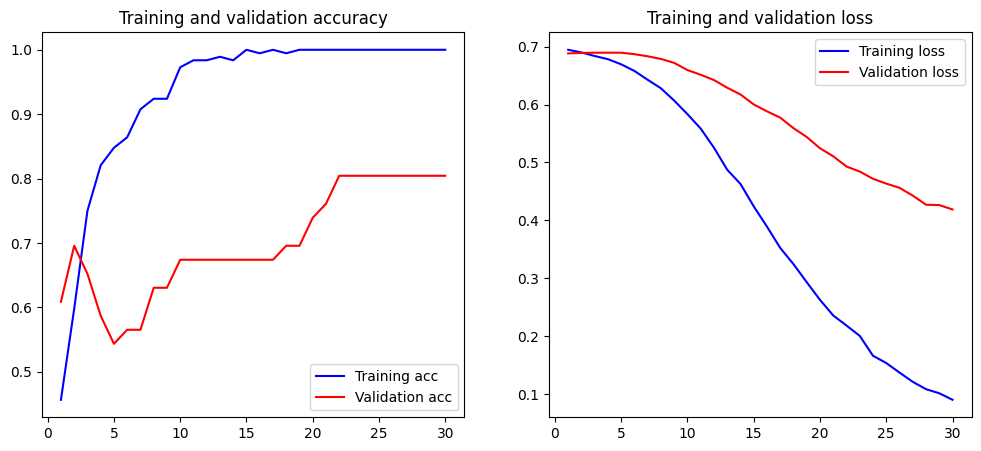

In [ ]:
plot_history(history)

In [ ]:
model3.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf')

MLP with append

In [ ]:
g=np.array(vad[0])

In [ ]:
V=len(embeddings[0])
g.resize(V,refcheck=False)

In [ ]:
np.row_stack((embeddings[0],g)).shape

(2, 2333)

In [ ]:
combined_embeddings_append_tfidf_clean=[]
vad=np.array(vad)
V=len(embeddings[0])
for i,j in zip(embeddings,vad):
  vad.resize(V,refcheck=False)
  combined_embeddings_append_tfidf_clean.append(np.row_stack((i,vad)))

In [ ]:
combined_embeddings_append_tfidf_clean[0].shape

(2, 3623)

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model4 = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model4.add(Dense(64,input_shape=(2, 3623),kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model4.add(Dropout(0.25)),#nice
model4.add(Dense(32,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model4.add(Dense(1, activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model4.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 2, 64)             231936    
                                                                 
 dropout_22 (Dropout)        (None, 2, 64)             0         
                                                                 
 dense_67 (Dense)            (None, 2, 32)             2080      
                                                                 
 dense_68 (Dense)            (None, 2, 1)              33        
                                                                 
Total params: 234,049
Trainable params: 234,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model4.fit(np.array(combined_embeddings_append_tfidf_clean), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 3s 23ms/step - loss: 0.6923 - accuracy: 0.5435 - val_loss: 0.7444 - val_accuracy: 0.4022
Epoch 2/30
37/37 [==============================] - 0s 12ms/step - loss: 0.6944 - accuracy: 0.5897 - val_loss: 0.7191 - val_accuracy: 0.4022
Epoch 3/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6892 - accuracy: 0.6196 - val_loss: 0.7078 - val_accuracy: 0.3913
Epoch 4/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6867 - accuracy: 0.6630 - val_loss: 0.7116 - val_accuracy: 0.4022
Epoch 5/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6864 - accuracy: 0.6712 - val_loss: 0.7529 - val_accuracy: 0.3913
Epoch 6/30
37/37 [==============================] - 0s 8ms/step - loss: 0.6787 - accuracy: 0.6766 - val_loss: 0.7248 - val_accuracy: 0.3913
Epoch 7/30
37/37 [==============================] - 0s 8ms/step - loss: 0.6859 - accuracy: 0.6848 - val_loss: 0.7180 - val_accuracy: 0.4022
Epoch 8/30
37/37 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

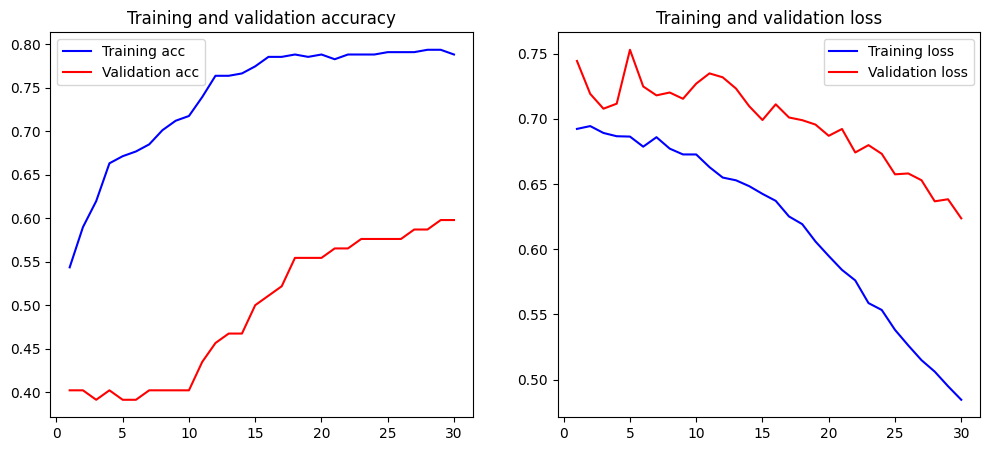

In [ ]:
plot_history(history)

In [ ]:
model4.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf_append')

MLP with tfidf unclean

In [ ]:
import pickle 

data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/tfidf_train.pkl', 'rb') as file:
  data = pickle.load(file)

In [ ]:
embeddings = [] 
for i in range(data.shape[0]):
  embeddings.append(data[i].toarray().tolist()[0]) 

In [ ]:
vad = []
for i, j in df_mis.iterrows():
  vad.append([j['arousal'], j['valence'], j['dominance']])   

In [ ]:
concat_array = [] 
for i in range(len(embeddings)): 
  concat_array.append(embeddings[i]+vad[i]) 

In [ ]:
len(concat_array[0])

3670

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model5 = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model5.add(Dense(64,input_dim=3670,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model5.add(Dropout(0.25)),#nice
model5.add(Dense(32,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 64)                234944    
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_88 (Dense)            (None, 32)                2080      
                                                                 
 dense_89 (Dense)            (None, 1)                 33        
                                                                 
Total params: 237,057
Trainable params: 237,057
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model5.fit(np.array(concat_array), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5652 - val_loss: 0.6998 - val_accuracy: 0.3261
Epoch 2/30
37/37 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.5870 - val_loss: 0.6997 - val_accuracy: 0.3261
Epoch 3/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6840 - accuracy: 0.6033 - val_loss: 0.6992 - val_accuracy: 0.3261
Epoch 4/30
37/37 [==============================] - 0s 8ms/step - loss: 0.6776 - accuracy: 0.5924 - val_loss: 0.6997 - val_accuracy: 0.3261
Epoch 5/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6705 - accuracy: 0.5815 - val_loss: 0.7000 - val_accuracy: 0.3261
Epoch 6/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6609 - accuracy: 0.5978 - val_loss: 0.6985 - val_accuracy: 0.3261
Epoch 7/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6483 - accuracy: 0.5978 - val_loss: 0.6981 - val_accuracy: 0.3261
Epoch 8/30
37/37 [=

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

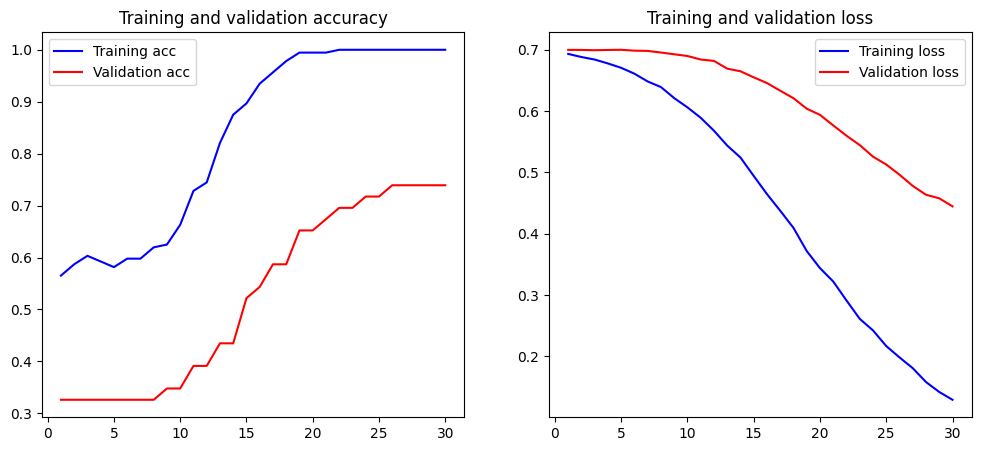

In [ ]:
plot_history(history)

In [ ]:
model5.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf_unclean')

#unlcean append

In [ ]:
combined_embeddings_append_tfidf_unclean=[]
vad=np.array(vad)
V=len(embeddings[0])
for i,j in zip(embeddings,vad):
  vad.resize(V,refcheck=False)
  combined_embeddings_append_tfidf_unclean.append(np.row_stack((i,vad)))

In [ ]:
combined_embeddings_append_tfidf_unclean[0].shape

(2, 3667)

In [ ]:
combined_embeddings_append_tfidf_unclean

[array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.38659328, 0.43033722, 0.41227335, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.38659328, 0.43033722, 0.41227335, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.38659328, 0.43033722, 0.41227335, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.38659328, 0.43033722, 0.41227335, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.38659328, 0.43033722, 0.41227335, ..., 0.        , 0.        ,
         0.        ]]),
 array([[0.        , 0.       

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model6 = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model6.add(Dense(64,input_shape=(2, 3667),kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model6.add(Dropout(0.25)),#nice
model6.add(Dense(32,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model6.add(Dense(1, activation='sigmoid'))
model6.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model6.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 2, 64)             234752    
                                                                 
 dropout_33 (Dropout)        (None, 2, 64)             0         
                                                                 
 dense_100 (Dense)           (None, 2, 32)             2080      
                                                                 
 dense_101 (Dense)           (None, 2, 1)              33        
                                                                 
Total params: 236,865
Trainable params: 236,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model6.fit(np.array(combined_embeddings_append_tfidf_unclean), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 2s 17ms/step - loss: 0.6981 - accuracy: 0.5462 - val_loss: 0.7248 - val_accuracy: 0.4348
Epoch 2/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6940 - accuracy: 0.6467 - val_loss: 0.7272 - val_accuracy: 0.4457
Epoch 3/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6842 - accuracy: 0.6793 - val_loss: 0.7309 - val_accuracy: 0.4348
Epoch 4/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6825 - accuracy: 0.6957 - val_loss: 0.7091 - val_accuracy: 0.4565
Epoch 5/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6800 - accuracy: 0.7228 - val_loss: 0.7110 - val_accuracy: 0.4674
Epoch 6/30
37/37 [==============================] - 0s 9ms/step - loss: 0.6729 - accuracy: 0.7337 - val_loss: 0.7404 - val_accuracy: 0.4565
Epoch 7/30
37/37 [==============================] - 0s 7ms/step - loss: 0.6733 - accuracy: 0.7473 - val_loss: 0.7394 - val_accuracy: 0.4674
Epoch 8/30
37/37

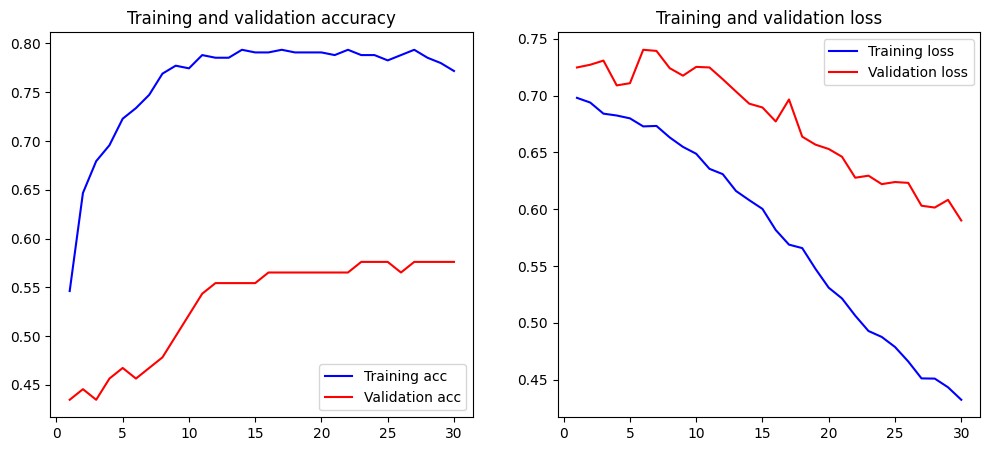

In [ ]:
plot_history(history)

In [ ]:
model6.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf_unclean_append')

### Evaluating all 6 models on eval dataset

In [ ]:
df_mis

,Unnamed: 0,file,transcript,file_path,arousal,valence,dominance,label
0,85,266Jx1t_N5s,so this is a new side of Andrew Tate it's a ne...,/data/non-misogynistic/266Jx1t_N5s.wav,0.386593,0.430337,0.412273,0
1,90,BXqtYb8FFT0,do you like dwight i do i do very much that's ...,/data/non-misogynistic/BXqtYb8FFT0.wav,0.585154,0.638248,0.794754,0
2,41,audio_42.wav,she ate like a pig you could see blood coming ...,/data/misogyny/audio_42.wav,0.645193,0.682874,0.221729,1
3,109,nZf5blCBIoM,and how long have you all been together I don'...,/data/non-misogynistic/nZf5blCBIoM.wav,0.543323,0.570202,0.634388,0
4,22,audio_3.wav,If you're dressed inappropriately shorts I don...,/data/misogyny/audio_3.wav,0.757306,0.716410,0.347532,1
...,...,...,...,...,...,...,...,...
119,32,audio_39.wav,saying that women can't do condom halls women ...,/data/misogyny/audio_39.wav,0.920418,0.857700,0.494905,1
120,5,audio_14.wav,You once said that you'd be open to a female s...,/data/misogyny/audio_14.wav,0.534481,0.586326,0.536647,1
121,115,g3ftcXUchOc,yo what is taking Justin so long facts man I'm...,/data/non-misogynistic/g3ftcXUchOc.wav,1.010749,0.907015,0.242756,0
122,21,audio_29.wav,the truth is you know what's crazy about all o...,/data/misogyny/audio_29.wav,0.860518,0.846006,0.334603,1


In [ ]:
df_eval=pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/eval_set.csv')
df_eval

,video_id,file_path,transcript,arousal,valence,dominance,label
0,audio_81.wav,/data/nonmisogyny_eval/audio_81.wav,I m not hating on men or blaming men I am lite...,0.630544,0.681015,0.262293,0
1,audio_82.wav,/data/nonmisogyny_eval/audio_82.wav,it seems like you guys fight it and I feel lik...,0.597634,0.625759,0.379943,0
2,audio_83.wav,/data/nonmisogyny_eval/audio_83.wav,okay so first of all I don't think its an atta...,0.672102,0.650475,0.466477,0
3,audio_84.wav,/data/nonmisogyny_eval/audio_84.wav,you also write about and this is unplesant stu...,0.359321,0.499993,0.416417,0
4,audio_85.wav,/data/nonmisogyny_eval/audio_85.wav,embattled CNN anchor Don Lemon absent for a th...,0.787427,0.782679,0.511144,0
5,audio_82.wav,/data/misogyny_eval/audio_82.wav,she is wearing her fuck me boots very nice is ...,0.394403,0.423904,0.391352,1
6,audio_83.wav,/data/misogyny_eval/audio_83.wav,He hated girls who sat like boys who acted lik...,0.311040,0.423604,0.078612,1
7,eval_12.wav,/data/misogyny_eval/eval_12.wav,are you saying women cannot do condom hauls? W...,0.772815,0.762862,0.217582,1
8,eval_5.wav,/data/misogyny_eval/eval_5.wav,I don't think the world has ever been equal. I...,0.773147,0.801821,0.276131,1
9,7NUU24OOh3Y,/data/nonmisogyny_eval/7NUU24OOh3Y.wav,this video shows what the most popular books o...,0.604059,0.633617,0.705374,0


In [ ]:
def generate_tfidf(data,df_eval,clean):
  tfidf_vectorizer = TfidfVectorizer() 
  sw = stopwords.words('english') #you can adjust the language as you desire
  sw.remove('not') #we exclude not from the stopwords corpus since removing not from the text will change the context of the text
  transcripts=data['Transcript'].copy()
  if clean:
    tokens_to_text=[]
    for i in range (len(transcripts)):
      transcripts[i] = re.sub(r"(@[A-Za-z0–9_]+)|[^\w\s]|#|http\S+", "", transcripts[i])
      transcripts[i] = transcripts[i].lower() 
      transcripts[i] = word_tokenize(transcripts[i])
      transcripts[i] = [word for word in transcripts[i] if not word in sw]
      s = ' '.join(transcripts[i])
      tokens_to_text.append(s)
    data['clean_transcript']=tokens_to_text
    tfidf_train_vectors = tfidf_vectorizer.fit_transform(data['clean_transcript'])

  else:
    tfidf_train_vectors = tfidf_vectorizer.fit_transform(data['Transcript'])
  
  # with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/misogyny_tfidf_cleaned.pkl', 'wb') as fin:
  #   pickle.dump(tfidf_train_vectors, fin)
  tfidf_test_vectors = tfidf_vectorizer.transform(df_eval['transcript'])
    
  with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/eval_tfidf_cleaned.pkl', 'wb') as fin:
    pickle.dump(tfidf_test_vectors, fin)
  return tfidf_train_vectors

In [ ]:
generate_tfidf(df_mis,df_eval,clean=True)#generate tfidf for cleaned data
#generate_tfidf(df_mis,df_eval,clean=False)#generate tfidf for uncleaned data

<230x3623 sparse matrix of type '<class 'numpy.float64'>'
	with 9683 stored elements in Compressed Sparse Row format>

In [ ]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
import joblib
import numpy as np

In [ ]:
def mlp_eval(filename,input_embeddings,df_eval):
  model2 = keras.models.load_model(filename)
  preds=model2.predict(np.array(input_embeddings))
  #print(preds)
  y_pred=[]
  for y in preds:
    if y[0]>0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  #print(y_pred)
  #print(df_eval['label'])
  print(classification_report(df_eval['label'],y_pred))

  accuracy = accuracy_score(df_eval['label'],y_pred)
  precision = precision_score(df_eval['label'],y_pred)
  recall = recall_score(df_eval['label'],y_pred)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)

  cm = confusion_matrix(df_eval['label'],y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Bert embeddings

In [ ]:
bert_embeddings_eval=joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/bert_eval_embeddings.pkl')

In [ ]:
eval_embeddings1=[]
for i,j in zip(bert_embeddings_eval,df_eval.iterrows()):
  i=np.append(i,j[1]['arousal'])
  i=np.append(i,j[1]['valence'])
  i=np.append(i,j[1]['dominance'])
  eval_embeddings1.append(i)

2/2 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.85      0.85      0.85        26

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57

Accuracy: 0.8596491228070176
Precision: 0.8461538461538461
Recall: 0.8461538461538461


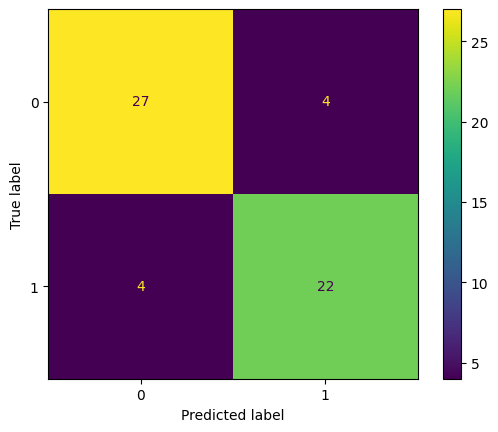

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models1',eval_embeddings1,df_eval)

In [ ]:
eval_embeddings_append=[]
avd=np.array([])
V=len(bert_embeddings_eval[0])
for i,j in zip(bert_embeddings_eval,df_eval.iterrows()):
  #print(i)
  avd=np.append(avd,j[1]['arousal'])
  avd=np.append(avd,j[1]['valence'])
  avd=np.append(avd,j[1]['dominance'])
  avd.resize(V,refcheck=False)
  eval_embeddings_append.append(np.row_stack((i,avd)))

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        31
           1       0.81      0.85      0.83        26

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57

Accuracy: 0.8421052631578947
Precision: 0.8148148148148148
Recall: 0.8461538461538461


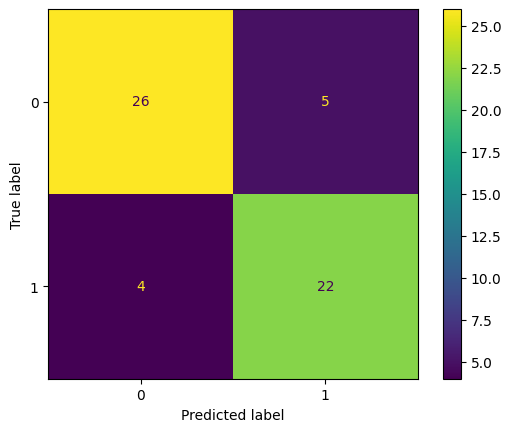

In [ ]:
#MLP_fusion_models_append
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_append',eval_embeddings_append,df_eval)

### TFIDF CLEAN 

In [ ]:
data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/eval_tfidf_cleaned.pkl', 'rb') as file:
  data = pickle.load(file)

embeddings3 = [] 
for i in range(data.shape[0]):
  embeddings3.append(data[i].toarray().tolist()[0]) 

vad3 = []
for i, j in df_eval.iterrows():
  vad3.append([j['arousal'], j['valence'], j['dominance']])  

concat_array3 = [] 
for i in range(len(embeddings3)): 
  concat_array3.append(embeddings3[i]+vad3[i]) 

In [ ]:
len(concat_array3[0])

3626

2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.83      0.77      0.80        26

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57

Accuracy: 0.8245614035087719
Precision: 0.8333333333333334
Recall: 0.7692307692307693


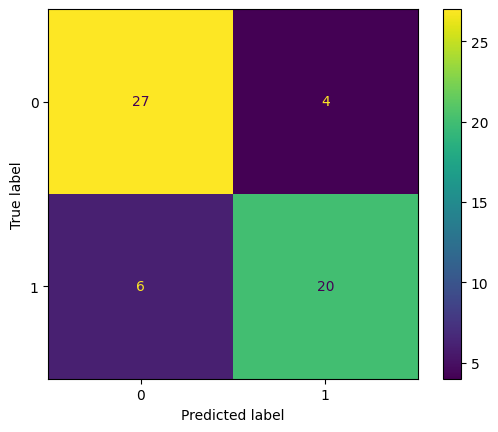

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf',concat_array3,df_eval)

In [ ]:
#append
eval_embeddings_append_tfidf=[]
vad3=np.array(vad3)
V=len(embeddings3[0])
for i,j in zip(embeddings3,vad3):
  vad3.resize(V,refcheck=False)
  eval_embeddings_append_tfidf.append(np.row_stack((i,vad3)))

In [ ]:
eval_embeddings_append_tfidf[0].shape

(2, 3623)

2/2 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        31
           1       0.81      0.65      0.72        26

    accuracy                           0.77        57
   macro avg       0.78      0.76      0.76        57
weighted avg       0.78      0.77      0.77        57

Accuracy: 0.7719298245614035
Precision: 0.8095238095238095
Recall: 0.6538461538461539


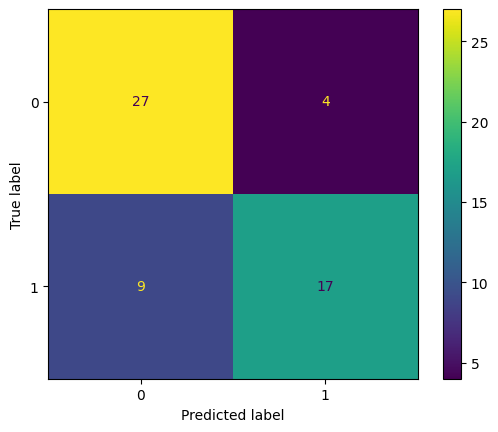

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf_append',eval_embeddings_append_tfidf,df_eval)

### TFIDF UNCLEAN

In [ ]:
data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/eval_tfidf.pkl', 'rb') as file:
  data = pickle.load(file)

embeddings3 = [] 
for i in range(data.shape[0]):
  embeddings3.append(data[i].toarray().tolist()[0]) 

vad3 = []
for i, j in df_eval.iterrows():
  vad3.append([j['arousal'], j['valence'], j['dominance']])  

concat_array3 = [] 
for i in range(len(embeddings3)): 
  concat_array3.append(embeddings3[i]+vad3[i]) 

2/2 [==============================] - 0s 10ms/step
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        31
           1       0.85      0.65      0.74        26

    accuracy                           0.79        57
   macro avg       0.80      0.78      0.78        57
weighted avg       0.80      0.79      0.79        57

Accuracy: 0.7894736842105263
Precision: 0.85
Recall: 0.6538461538461539


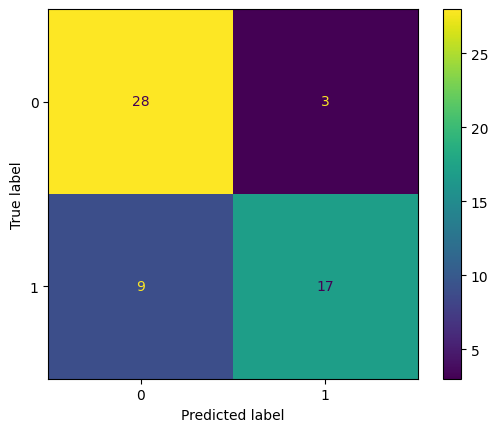

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf_unclean',concat_array3,df_eval)

In [ ]:
#append
eval_embeddings_append_tfidf=[]
vad3=np.array(vad3)
V=len(embeddings3[0])
for i,j in zip(embeddings3,vad3):
  vad3.resize(V,refcheck=False)
  eval_embeddings_append_tfidf.append(np.row_stack((i,vad3)))

In [ ]:
eval_embeddings_append_tfidf[0].shape

(2, 3667)

2/2 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        31
           1       0.83      0.73      0.78        26

    accuracy                           0.81        57
   macro avg       0.81      0.80      0.80        57
weighted avg       0.81      0.81      0.81        57

Accuracy: 0.8070175438596491
Precision: 0.8260869565217391
Recall: 0.7307692307692307


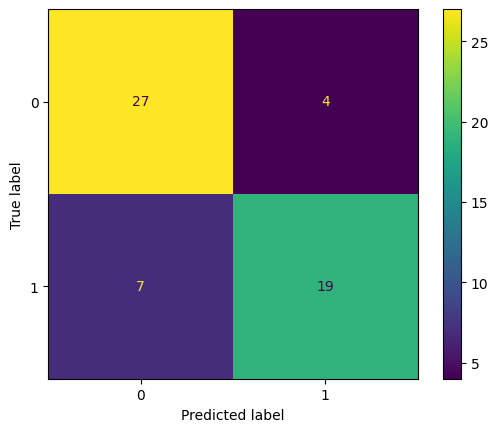

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/MLP_fusion_models_tfidf_unclean_append',eval_embeddings_append_tfidf,df_eval)

TEXT only 

BERT concat

In [ ]:
import joblib
import numpy as np

In [ ]:
bert_embeddings=joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/bert_train_embeddings.pkl')

In [ ]:
bert_embeddings[0].shape

(768,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

In [ ]:
#nice
model = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model.add(Dense(32,input_dim=768)),
model.add(Activation('relu')),
model.add(Dropout(0.25)),#nice
model.add(Dense(16)),
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001,weight_decay=0.001), metrics=['accuracy'])


In [ ]:
from tensorflow.keras.regularizers import l2
model = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model.add(Dense(32,input_dim=768,kernel_regularizer=l2(1e-5),activation="relu")),
model.add(Dropout(0.2)),#nice
model.add(Dense(16,kernel_regularizer=l2(1e-5),activation="relu")),
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 32)                24608     
                                                                 
 dropout_34 (Dropout)        (None, 32)                0         
                                                                 
 dense_103 (Dense)           (None, 16)                528       
                                                                 
 dense_104 (Dense)           (None, 1)                 17        
                                                                 
Total params: 25,153
Trainable params: 25,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(np.array(bert_embeddings), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 4s 9ms/step - loss: 0.6879 - accuracy: 0.5707 - val_loss: 0.7022 - val_accuracy: 0.5000
Epoch 2/30
37/37 [==============================] - 0s 5ms/step - loss: 0.6476 - accuracy: 0.6304 - val_loss: 0.6757 - val_accuracy: 0.5000
Epoch 3/30
37/37 [==============================] - 0s 4ms/step - loss: 0.6270 - accuracy: 0.6685 - val_loss: 0.6362 - val_accuracy: 0.6522
Epoch 4/30
37/37 [==============================] - 0s 4ms/step - loss: 0.6004 - accuracy: 0.6793 - val_loss: 0.5950 - val_accuracy: 0.7609
Epoch 5/30
37/37 [==============================] - 0s 4ms/step - loss: 0.5763 - accuracy: 0.7228 - val_loss: 0.5533 - val_accuracy: 0.8696
Epoch 6/30
37/37 [==============================] - 0s 4ms/step - loss: 0.5648 - accuracy: 0.7065 - val_loss: 0.5165 - val_accuracy: 0.9348
Epoch 7/30
37/37 [==============================] - 0s 4ms/step - loss: 0.5447 - accuracy: 0.7717 - val_loss: 0.4824 - val_accuracy: 0.9348
Epoch 8/30
37/37 [==

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

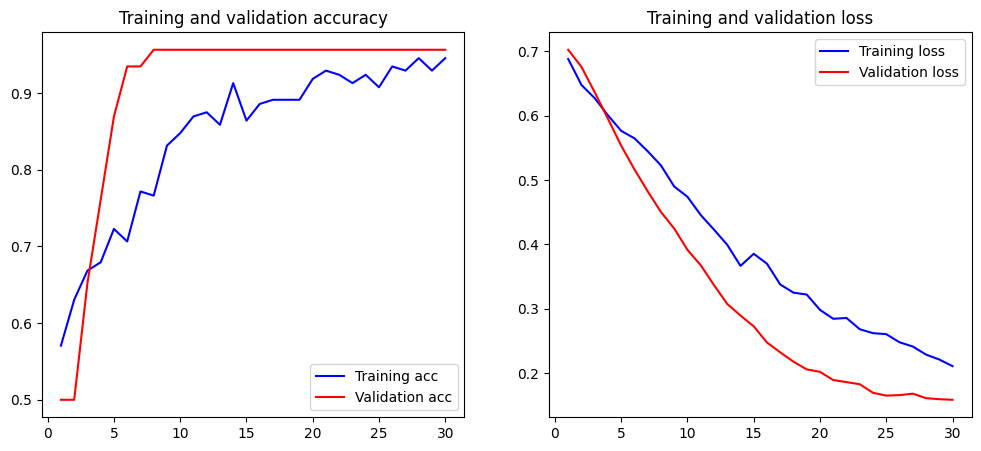

In [ ]:
plot_history(history)

In [ ]:
model.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/BERT_text')

### TFIDF clean concat

In [ ]:
import pickle 

data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/tfidf_train_cleaned.pkl', 'rb') as file:
  data = pickle.load(file)

In [ ]:
embeddings = [] 
for i in range(data.shape[0]):
  embeddings.append(data[i].toarray().tolist()[0]) 

In [ ]:
len(embeddings[0])

3623

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model3 = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model3.add(Dense(64,input_dim=3623,kernel_regularizer=l2(1e-6),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model3.add(Dropout(0.2)),#nice
model3.add(Dense(32,kernel_regularizer=l2(1e-6),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_111 (Dense)           (None, 64)                231936    
                                                                 
 dropout_37 (Dropout)        (None, 64)                0         
                                                                 
 dense_112 (Dense)           (None, 32)                2080      
                                                                 
 dense_113 (Dense)           (None, 1)                 33        
                                                                 
Total params: 234,049
Trainable params: 234,049
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model3.fit(np.array(embeddings), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 2s 18ms/step - loss: 0.6938 - accuracy: 0.4837 - val_loss: 0.6938 - val_accuracy: 0.4565
Epoch 2/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6898 - accuracy: 0.6413 - val_loss: 0.6941 - val_accuracy: 0.4565
Epoch 3/30
37/37 [==============================] - 0s 11ms/step - loss: 0.6845 - accuracy: 0.8424 - val_loss: 0.6940 - val_accuracy: 0.4783
Epoch 4/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6800 - accuracy: 0.8370 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/30
37/37 [==============================] - 0s 10ms/step - loss: 0.6725 - accuracy: 0.9022 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 6/30
37/37 [==============================] - 0s 12ms/step - loss: 0.6646 - accuracy: 0.9348 - val_loss: 0.6911 - val_accuracy: 0.5870
Epoch 7/30
37/37 [==============================] - 0s 11ms/step - loss: 0.6563 - accuracy: 0.9402 - val_loss: 0.6895 - val_accuracy: 0.5870
Epoch 8/30
37

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

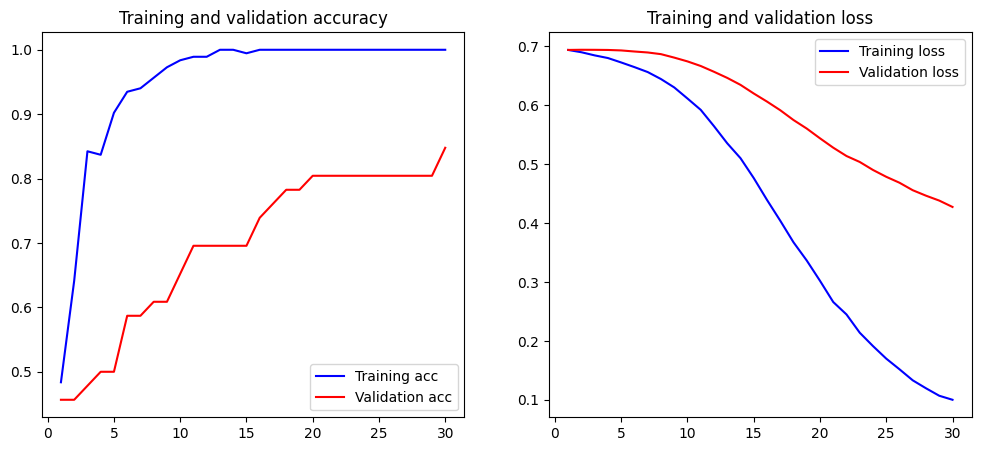

In [ ]:
plot_history(history)

In [ ]:
model3.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/tfidf_clean_text')

### TFIDF unclean concat

In [ ]:
import pickle 

data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/tfidf_train.pkl', 'rb') as file:
  data = pickle.load(file)

embeddings = [] 
for i in range(data.shape[0]):
  embeddings.append(data[i].toarray().tolist()[0]) 

In [ ]:
len(embeddings[0])

3667

In [ ]:
#FINAL
from tensorflow.keras.regularizers import l2
model5 = Sequential()
#model.add(Dense(neuron1, input_dim=768, activation='relu'))
model5.add(Dense(64,input_dim=3667,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model5.add(Dropout(0.2)),#nice
model5.add(Dense(32,kernel_regularizer=l2(1e-5),activation="relu",kernel_initializer=tf.keras.initializers.HeNormal())),
model5.add(Dense(1, activation='sigmoid'))
model5.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_120 (Dense)           (None, 64)                234752    
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_121 (Dense)           (None, 32)                2080      
                                                                 
 dense_122 (Dense)           (None, 1)                 33        
                                                                 
Total params: 236,865
Trainable params: 236,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np

In [ ]:
history=model5.fit(np.array(embeddings), df_mis['label'], epochs=30, batch_size=5,validation_split=0.2)

Epoch 1/30
37/37 [==============================] - 3s 22ms/step - loss: 0.6963 - accuracy: 0.4402 - val_loss: 0.6925 - val_accuracy: 0.5435
Epoch 2/30
37/37 [==============================] - 0s 13ms/step - loss: 0.6907 - accuracy: 0.6522 - val_loss: 0.6920 - val_accuracy: 0.6522
Epoch 3/30
37/37 [==============================] - 1s 15ms/step - loss: 0.6865 - accuracy: 0.8043 - val_loss: 0.6916 - val_accuracy: 0.6304
Epoch 4/30
37/37 [==============================] - 1s 16ms/step - loss: 0.6813 - accuracy: 0.9076 - val_loss: 0.6904 - val_accuracy: 0.6304
Epoch 5/30
37/37 [==============================] - 0s 12ms/step - loss: 0.6742 - accuracy: 0.8913 - val_loss: 0.6891 - val_accuracy: 0.5870
Epoch 6/30
37/37 [==============================] - 1s 14ms/step - loss: 0.6648 - accuracy: 0.9457 - val_loss: 0.6857 - val_accuracy: 0.6087
Epoch 7/30
37/37 [==============================] - 0s 12ms/step - loss: 0.6532 - accuracy: 0.9457 - val_loss: 0.6819 - val_accuracy: 0.5870
Epoch 8/30
37

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

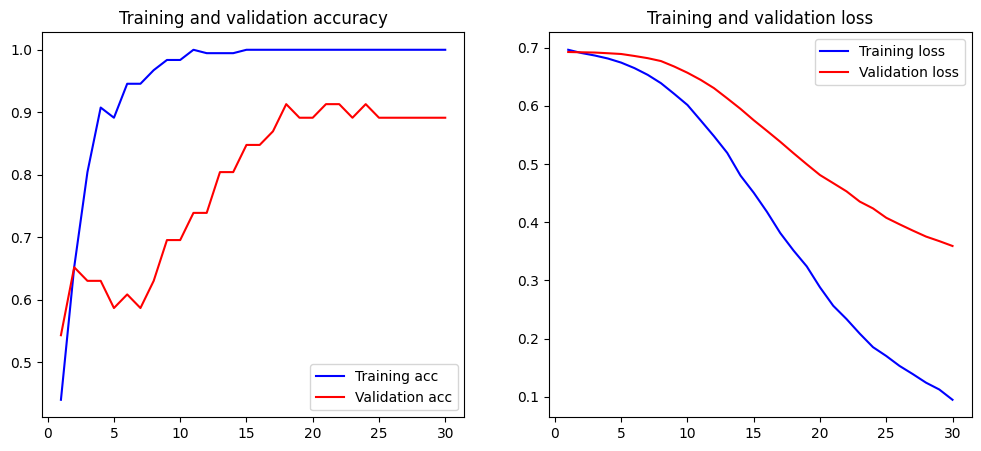

In [ ]:
plot_history(history)

In [ ]:
model5.save('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/tfidf_unclean_text')

### Evaluating eval set on text based models

### Evaluating all 6 models on eval dataset

In [ ]:
df_eval=pd.read_csv('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/eval_set.csv')
df_eval

,video_id,file_path,transcript,arousal,valence,dominance,label
0,audio_81.wav,/data/nonmisogyny_eval/audio_81.wav,I m not hating on men or blaming men I am lite...,0.630544,0.681015,0.262293,0
1,audio_82.wav,/data/nonmisogyny_eval/audio_82.wav,it seems like you guys fight it and I feel lik...,0.597634,0.625759,0.379943,0
2,audio_83.wav,/data/nonmisogyny_eval/audio_83.wav,okay so first of all I don't think its an atta...,0.672102,0.650475,0.466477,0
3,audio_84.wav,/data/nonmisogyny_eval/audio_84.wav,you also write about and this is unplesant stu...,0.359321,0.499993,0.416417,0
4,audio_85.wav,/data/nonmisogyny_eval/audio_85.wav,embattled CNN anchor Don Lemon absent for a th...,0.787427,0.782679,0.511144,0
5,audio_82.wav,/data/misogyny_eval/audio_82.wav,she is wearing her fuck me boots very nice is ...,0.394403,0.423904,0.391352,1
6,audio_83.wav,/data/misogyny_eval/audio_83.wav,He hated girls who sat like boys who acted lik...,0.311040,0.423604,0.078612,1
7,eval_12.wav,/data/misogyny_eval/eval_12.wav,are you saying women cannot do condom hauls? W...,0.772815,0.762862,0.217582,1
8,eval_5.wav,/data/misogyny_eval/eval_5.wav,I don't think the world has ever been equal. I...,0.773147,0.801821,0.276131,1
9,7NUU24OOh3Y,/data/nonmisogyny_eval/7NUU24OOh3Y.wav,this video shows what the most popular books o...,0.604059,0.633617,0.705374,0


In [ ]:
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
import joblib
import numpy as np

In [ ]:
def mlp_eval(filename,input_embeddings,df_eval):
  model2 = keras.models.load_model(filename)
  preds=model2.predict(np.array(input_embeddings))
  #print(preds)
  y_pred=[]
  for y in preds:
    if y[0]>0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  #print(y_pred)
  #print(df_eval['label'])
  print(classification_report(df_eval['label'],y_pred))

  accuracy = accuracy_score(df_eval['label'],y_pred)
  precision = precision_score(df_eval['label'],y_pred)
  recall = recall_score(df_eval['label'],y_pred)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)

  cm = confusion_matrix(df_eval['label'],y_pred)
  ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Bert embeddings

In [ ]:
bert_embeddings_eval=joblib.load('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/bert_eval_embeddings.pkl')

In [ ]:
len(bert_embeddings_eval)

57

2/2 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.85      0.88      0.87        26

    accuracy                           0.88        57
   macro avg       0.88      0.88      0.88        57
weighted avg       0.88      0.88      0.88        57

Accuracy: 0.8771929824561403
Precision: 0.8518518518518519
Recall: 0.8846153846153846


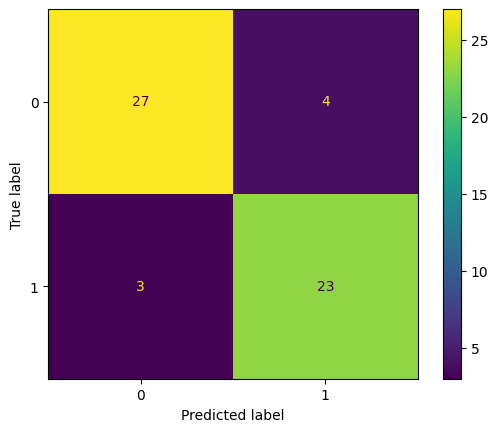

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/BERT_text',bert_embeddings_eval,df_eval)

### TFIDF CLEAN 

In [ ]:
data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/eval_tfidf_cleaned.pkl', 'rb') as file:
  data = pickle.load(file)

embeddings3 = [] 
for i in range(data.shape[0]):
  embeddings3.append(data[i].toarray().tolist()[0]) 

In [ ]:
len(embeddings3[0])

3623

2/2 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.75      0.87      0.81        31
           1       0.81      0.65      0.72        26

    accuracy                           0.77        57
   macro avg       0.78      0.76      0.76        57
weighted avg       0.78      0.77      0.77        57

Accuracy: 0.7719298245614035
Precision: 0.8095238095238095
Recall: 0.6538461538461539


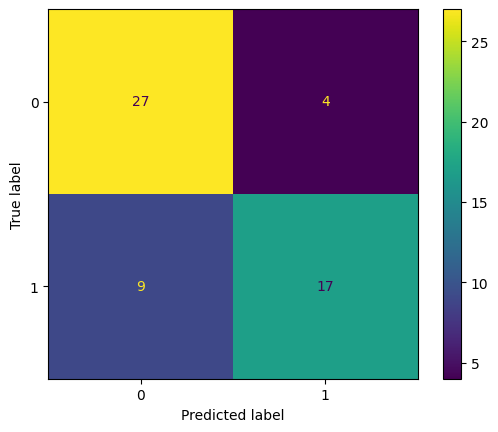

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/tfidf_clean_text',embeddings3,df_eval)

### TFIDF UNCLEAN

In [ ]:
data = None 

with open('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/data/embeddings/eval_tfidf.pkl', 'rb') as file:
  data = pickle.load(file)

embeddings3 = [] 
for i in range(data.shape[0]):
  embeddings3.append(data[i].toarray().tolist()[0]) 

2/2 [==============================] - 0s 11ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.83      0.77      0.80        26

    accuracy                           0.82        57
   macro avg       0.83      0.82      0.82        57
weighted avg       0.83      0.82      0.82        57

Accuracy: 0.8245614035087719
Precision: 0.8333333333333334
Recall: 0.7692307692307693


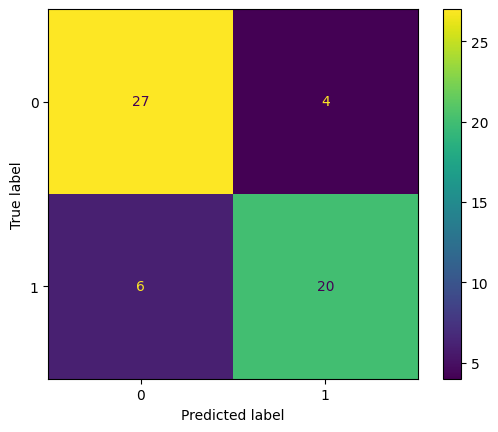

In [ ]:
#evaluate
mlp_eval('/content/drive/MyDrive/CSCI 535 Project/Implementation/training_models/models/tfidf_unclean_text',embeddings3,df_eval)